In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [36]:
from skimage import data
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
import time
import matplotlib.pyplot as plt

In [37]:
def soft_threshold(x, tau):
    return np.sign(x) * np.maximum(np.abs(x) - tau, 0)

def A(x):
    return gaussian_filter(x, sigma=4)

def AT(x):
    return gaussian_filter(x, sigma=4)

def Ashish(x0, x00, x1, y, ri, m):
    ix = x0.copy()
    xx = x1.copy()
    ey = y.copy()
    ix0 = x00.copy()
    nx = ri.copy()
    n = 1
    beta = 0.09
    alpha = 0.0001
    tau = 0.001
    err2 = []
    tim = []
    
    while n <= m:
        start_time = time.time()
        wn = xx + beta * (xx - ix)
        un = soft_threshold(xx + AT(y - A(wn)), tau)
        xx_ = (1 - alpha) * un + alpha * un / 2
        err2.append(20 * np.log10(np.linalg.norm(nx, 2) / np.linalg.norm(xx_ - nx, 2)))
        n += 1
        ix = xx.copy()
        xx = xx_.copy()
        tim.append(time.time() - start_time)
    
    return ix, ix0, xx, ey, xx_, nx, err2, tim

def Ashish22(x0, x00, x1, y, ri, m):
    ix = x0.copy()
    xx = x1.copy()
    ey = y.copy()
    ix0 = x00.copy()
    nx = ri.copy()
    n = 1
    beta = 0
    alpha = 0.0001
    tau = 0.001
    err2 = []
    tim = []
    
    while n <= m:
        start_time = time.time()
        wn = xx + beta * (xx - ix)
        un = soft_threshold(xx + AT(y - A(wn)), tau)
        xx_ = (1 - alpha) * un + alpha * un / 2
        err2.append(20 * np.log10(np.linalg.norm(nx, 2) / np.linalg.norm(xx_ - nx, 2)))
        n += 1
        ix = xx.copy()
        xx = xx_.copy()
        tim.append(time.time() - start_time)
    
    return ix, ix0, xx, ey, xx_, nx, err2, tim

In [38]:
### Tyler algorithm

def Tyler(x0, x00, x1, y, ri, m):
    ix = x0.copy()
    xx = x1.copy()
    ey = y.copy()
    ix0 = x00.copy()
    nx = ri.copy()
    n = 1
    beta = 0.09
    gamma = 0.001
    alpha = 0.0001
    tau = 0.001
    err2 = []
    tim = []
    
    while n <= m:
        start_time = time.time()
        wn = xx
        yn = soft_threshold(xx + AT(y - A(xx)), gamma)
        xx_ = soft_threshold(yn + AT(y - A(yn)), tau)
        err2.append(20 * np.log10(np.linalg.norm(nx, 2) / np.linalg.norm(xx_ - nx, 2)))
        n += 1
        ix = xx.copy()
        xx = xx_.copy()
        tim.append(time.time() - start_time)
    
    return ix, ix0, xx, ey, xx_, nx, err2, tim

In [39]:
### Momentum Tyler algorithm

def Momentum_Tyler(x0, x00, x1, y, ri, m):
    ix = x0.copy()
    xx = x1.copy()
    ey = y.copy()
    ix0 = x00.copy()
    nx = ri.copy()
    n = 1
    beta = 0.09
    gamma = 0.001
    alpha = 0.0001
    tau = 0.001
    err2 = []
    tim = []
    
    while n <= m:
        start_time = time.time()
        wn = xx + beta * (xx - ix)
        yn = soft_threshold(wn + AT(y - A(wn)), gamma)
        xx_ = soft_threshold(yn + AT(y - A(yn)), tau)
        err2.append(20 * np.log10(np.linalg.norm(nx, 2) / np.linalg.norm(xx_ - nx, 2)))
        n += 1
        ix = xx.copy()
        xx = xx_.copy()
        tim.append(time.time() - start_time)
    
    return ix, ix0, xx, ey, xx_, nx, err2, tim

### Cameraman image

In [40]:
# Load Image
#image_path = "cameraman.tif"
#yy = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#yy1 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#ri = yy1.astype(np.float64)

yy = data.camera().astype(np.float64)
yy1 = yy.copy()
ri = yy1.copy()  # Ensure ri is properly assigned
x0 = np.zeros_like(yy, dtype=np.float64)
x00 = np.zeros_like(yy, dtype=np.float64)
x1 = np.ones_like(yy, dtype=np.float64)


In [41]:
# Apply Gaussian Blur
y = gaussian_filter(yy, sigma=4)

# Number of iterations
m = 5

# Run Algorithms
start_time = time.time()
ix, ix0, xx, ey, xx_, nx, eri, tim = Ashish(x0, x00, x1, y, ri, m)
time1 = time.time() - start_time

start_time = time.time()
ix, ix0, xx, ey, xx2_, nx, eri2, tim2 = Ashish22(x0, x00, x1, y, ri, m)
time2 = time.time() - start_time

start_time = time.time()
ix, ix0, xx, ey, xx3_, nx, eri3, tim3 = Tyler(x0, x00, x1, y, ri, m)
time2 = time.time() - start_time

In [42]:
# Display Results
#cv2.imshow("Original", yy.astype(np.uint8))
#cv2.imshow("Blurred", y.astype(np.uint8))
#cv2.imshow("Algorithm M", xx_.astype(np.uint8))
#cv2.imshow("Algorithm M with θ=0", xx2_.astype(np.uint8))
#cv2.waitKey(0)
#cv2.destroyAllWindows()



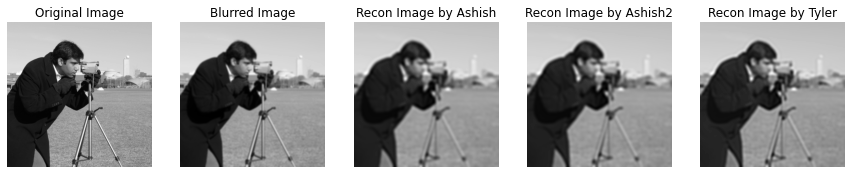

In [43]:

image = data.camera().astype(np.float64)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (7, 7), 4)

# Display the images in Jupyter Notebook
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")  # Hide axes

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Blurred Image")
axes[1].axis("off")

axes[2].imshow(xx_, cmap='gray')
axes[2].set_title("Recon Image by Ashish")
axes[2].axis("off")

axes[3].imshow(xx2_, cmap='gray')
axes[3].set_title("Recon Image by Ashish2")
axes[3].axis("off")

axes[4].imshow(xx3_, cmap='gray')
axes[4].set_title("Recon Image by Tyler")
axes[4].axis("off")

plt.show()

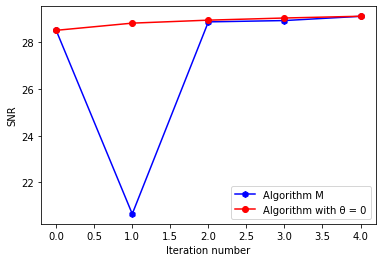

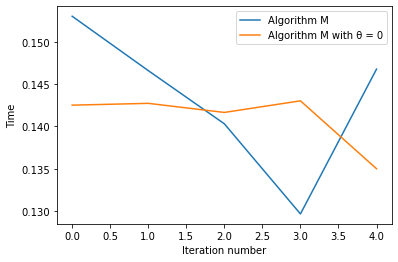

In [44]:
# Plot Error Convergence
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(len(eri)), eri, 'b-h', label='Algorithm M')
plt.plot(range(len(eri2)), eri2, 'r-o', label='Algorithm with θ = 0')
plt.xlabel('Iteration number')
plt.ylabel('SNR')
plt.legend()
plt.show()

# Plot Time Convergence
plt.figure()
plt.plot(range(len(tim)), tim, label='Algorithm M')
plt.plot(range(len(tim2)), tim2, label='Algorithm M with θ = 0')
plt.xlabel('Iteration number')
plt.ylabel('Time')
plt.legend()
plt.show()

### Coin image

In [45]:
from skimage import data
yy = data.coins().astype(np.float64)
yy1 = yy.copy()
ri = yy1.copy()  # Ensure ri is properly assigned
x0 = np.zeros_like(yy, dtype=np.float64)
x00 = np.zeros_like(yy, dtype=np.float64)
x1 = np.ones_like(yy, dtype=np.float64)


In [46]:
# Apply Gaussian Blur
y = gaussian_filter(yy, sigma=4)

# Number of iterations
m = 5

# Run Algorithms
start_time = time.time()
ix, ix0, xx, ey, xx_, nx, eri, tim = Ashish(x0, x00, x1, y, ri, m)
time1 = time.time() - start_time

start_time = time.time()
ix, ix0, xx, ey, xx2_, nx, eri2, tim2 = Ashish22(x0, x00, x1, y, ri, m)
time2 = time.time() - start_time

start_time = time.time()
ix, ix0, xx, ey, xx3_, nx, eri3, tim3 = Tyler(x0, x00, x1, y, ri, m)
time3 = time.time() - start_time

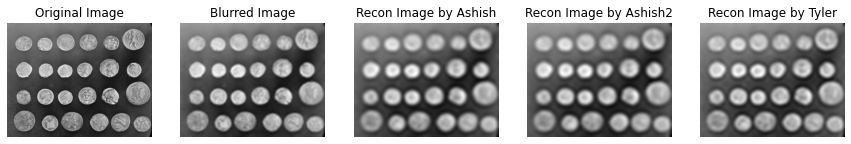

In [47]:
image = data.coins().astype(np.float64)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (7, 7), 4)

# Display the images in Jupyter Notebook
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")  # Hide axes

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Blurred Image")
axes[1].axis("off")

axes[2].imshow(xx_, cmap='gray')
axes[2].set_title("Recon Image by Ashish")
axes[2].axis("off")

axes[3].imshow(xx2_, cmap='gray')
axes[3].set_title("Recon Image by Ashish2")
axes[3].axis("off")

axes[4].imshow(xx3_, cmap='gray')
axes[4].set_title("Recon Image by Tyler")
axes[4].axis("off")

plt.show()

### Astronaut image

In [48]:
astronaut = data.astronaut()


from skimage.color import rgb2gray
yy = rgb2gray(astronaut).astype(np.float64)
yy1 = yy.copy()
ri = yy1.copy()  # Ensure ri is properly assigned
x0 = np.zeros_like(yy, dtype=np.float64)
x00 = np.zeros_like(yy, dtype=np.float64)
x1 = np.ones_like(yy, dtype=np.float64)

In [49]:
# Apply Gaussian Blur
y = gaussian_filter(yy, sigma=4)

# Number of iterations
m = 5

# Run Algorithms
start_time = time.time()
ix, ix0, xx, ey, xx_, nx, eri, tim = Ashish(x0, x00, x1, y, ri, m)
time1 = time.time() - start_time

start_time = time.time()
ix, ix0, xx, ey, xx2_, nx, eri2, tim2 = Ashish22(x0, x00, x1, y, ri, m)
time2 = time.time() - start_time



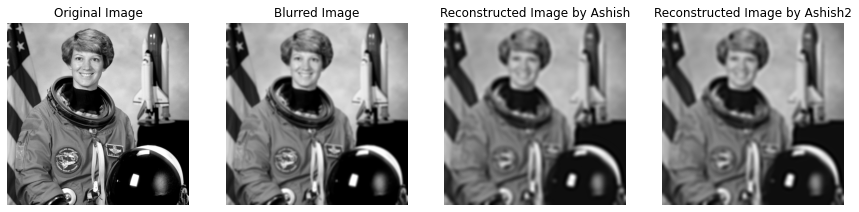

In [50]:
image = rgb2gray(astronaut).astype(np.float64)

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (7, 7), 4)

# Display the images in Jupyter Notebook
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")  # Hide axes

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Blurred Image")
axes[1].axis("off")

axes[2].imshow(xx_, cmap='gray')
axes[2].set_title("Reconstructed Image by Ashish")
axes[2].axis("off")

axes[3].imshow(xx2_, cmap='gray')
axes[3].set_title("Reconstructed Image by Ashish2")
axes[3].axis("off")

plt.show()

### Let's try colour images

In [74]:
# Load a built-in color image (e.g., astronaut)
image = data.astronaut().astype(np.float64)

# Apply Gaussian Blur to the color image
blurred_image = np.zeros_like(image)
for i in range(3):  # Process each color channel separately (R, G, B)
    blurred_image[:, :, i] = gaussian_filter(image[:, :, i], sigma=4)

In [75]:
# Define forward and adjoint operators (Gaussian blur)
def A(x):
    return np.stack([gaussian_filter(x[:, :, i], sigma=4) for i in range(3)], axis=-1)

def AT(x):
    return np.stack([gaussian_filter(x[:, :, i], sigma=4) for i in range(3)], axis=-1)

def f(x,y):
    return 0.5*np.linalg.norm(A(x) - y)**2

def grad_f(x,y):
    return AT(A(x)-y)

In [76]:
# Function to apply Ashish Algorithm M to each color channel
def Ashish_color(x0, x00, x1, y, ri, m):
    xx = x1.copy()
    beta = 0.09
    alpha = 0.0001
    tau = 0.001
    n = 1

    while n <= m:
        wn = xx + beta * (xx - x0)
        un = soft_threshold(xx + AT(y - A(wn)), tau)
        xx_ = (1 - alpha) * un + alpha * un / 2
        n += 1
        x0 = xx.copy()
        xx = xx_.copy()

    return xx_

# Function to apply Ashish Algorithm M with θ=0 to each color channel
def Ashish22_color(x0, x00, x1, y, ri, m):
    xx = x1.copy()
    beta = 0  # Set β=0 in Ashish22
    alpha = 0.0001
    tau = 0.001
    n = 1

    while n <= m:
        wn = xx + beta * (xx - x0)
        un = soft_threshold(xx + AT(y - A(wn)), tau)
        xx_ = (1 - alpha) * un + alpha * un / 2
        n += 1
        x0 = xx.copy()
        xx = xx_.copy()

    return xx_

In [100]:
def Tyler_color(x0, x00, x1, y, ri, m):
    ix = x0.copy()
    xx = x1.copy()
    ey = y.copy()
    ix0 = x00.copy()
    nx = ri.copy()
    n = 1
    gamma = 0.9
    tau = 0.1
    err2 = []
    tim = []
    
    while n <= m:
        start_time = time.time()
        wn = xx
        yn = soft_threshold(xx + AT(y - A(xx)), gamma)
        xx_ = soft_threshold(yn + AT(y - A(yn)), tau)
        err2.append(20 * np.log10(np.linalg.norm(nx.flatten(), 2) / np.linalg.norm((xx_ - nx).flatten(), 2)))
        n += 1
        ix = xx.copy()
        xx = xx_.copy()
        tim.append(time.time() - start_time)
    
    return xx_, err2, tim

In [101]:
# Momentum

def Tyler_Momentum_color(x0, x00, x1, y, ri, m):
    ix = x0.copy()
    xx = x1.copy()
    ey = y.copy()
    ix0 = x00.copy()
    nx = ri.copy()
    n = 1
    beta = 0.909
    gamma = 0.00023
    tau = 0.00001
    err2 = []
    tim = []
    
    while n <= m:
        start_time = time.time()
        wn = xx + beta * (xx - ix)
        yn = soft_threshold(xx + AT(y - A(xx)), gamma)
        xx_ = soft_threshold(yn + AT(y - A(yn)), tau)
        err2.append(20 * np.log10(np.linalg.norm(nx.flatten(), 2) / np.linalg.norm((xx_ - nx).flatten(), 2)))
        n += 1
        ix = xx.copy()
        xx = xx_.copy()
        tim.append(time.time() - start_time)
    
    return xx_, err2, tim

In [102]:
# Adaptive
def Tyler_Adaptive_color(x0, x00, x1, y, ri, m):
    ix = x0.copy()
    xx = x1.copy()
    ey = y.copy()
    ix0 = x00.copy()
    nx = ri.copy()
    n = 1
    beta = 0.09 # No momentum but used to find tau_n
    gamma = 0.001
    alpha = 0.0001
    tau = 0.001
      # Stop condition
    tolerance = 1e-6
    err2 = [np.inf]
    #err2 = []
    tim = []
    
    while err2[-1] > tolerance and n < m:
        #Find time per iteration
        start_time = time.time()
        # Set y_n (= wn)
        wn = xx
        yn = soft_threshold(xx + AT(y - A(xx)), gamma)
        #yn = soft_threshold(xx + gamma*AT(y - A(xx)), tau) # Scaled by gamma, needed?
        #Calculates adaptive step-size tau
        numerator = beta * f(yn,y)
        denominator = np.linalg.norm(grad_f(yn,y))**2
        tau_n = numerator / denominator if denominator > 1e-8 else 1e-6 # prevents division by (almost) 0, divergence
        #Main update using adaptive stepsize tau_n
        xx_ = soft_threshold(yn + AT(y - A(yn)), tau_n)
        #Finds error before updating x_n, flattening 3 channels into 1D vector
        err2.append(20 * np.log10(np.linalg.norm(nx.flatten(), 2) / np.linalg.norm((xx_ - nx).flatten(), 2)))
        #Increment counter increase
        n += 1
        ix = xx.copy()
        # Update x_n+1 for next iteration
        xx = xx_.copy()
        tim.append(time.time() - start_time)
    
    #return ix, ix0, xx, ey, xx_, nx, err2, tim
    return xx_, err2, tim

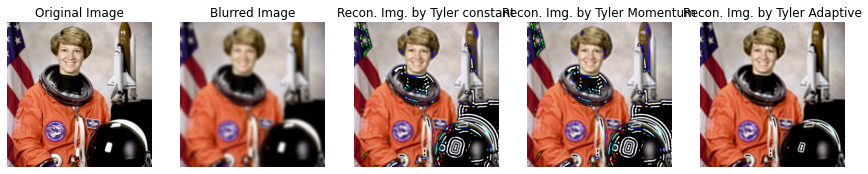

In [80]:
# Initialize variables for RGB processing
x0 = np.zeros_like(image)
x00 = np.zeros_like(image)
x1 = np.ones_like(image)
ri = image.copy()

# Number of iterations
m = 50  # Use a small number for quick testing

# Apply Ashish and Ashish2 algorithms to the color image
#reconstructed_1 = Ashish_color(x0, x00, x1, blurred_image, ri, m)
#reconstructed_2 = Ashish22_color(x0, x00, x1, blurred_image, ri, m)
reconstructed_1, snr1, time1 = Tyler_color(x0, x00, x1, blurred_image, ri, m)
reconstructed_2, snr2, time2 = Tyler_Momentum_color(x0, x00, x1, blurred_image, ri, m)
reconstructed_3,snr3, time3 = Tyler_Adaptive_color(x0, x00, x1, blurred_image, ri, m)

# Display the images in Jupyter Notebook
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

axes[0].imshow(image.astype(np.uint8))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(blurred_image.astype(np.uint8))
axes[1].set_title("Blurred Image")
axes[1].axis("off")

axes[2].imshow(reconstructed_1.astype(np.uint8))
axes[2].set_title(" Tyler constant")
axes[2].axis("off")

axes[3].imshow(reconstructed_2.astype(np.uint8))
axes[3].set_title(" Tyler Momen.")
axes[3].axis("off")

axes[4].imshow(reconstructed_3.astype(np.uint8))
axes[4].set_title(" Tyler Adap")
axes[4].axis("off")

plt.show()


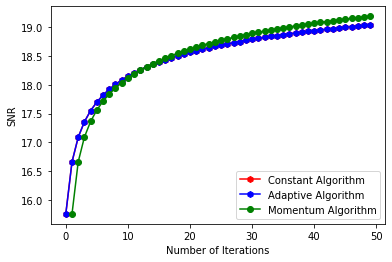

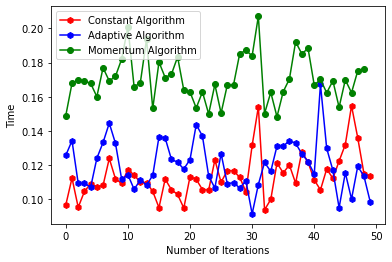

In [81]:
plt.figure()
#plt.plot(range(len(eri)), eri, 'b-h', label='Algorithm M')
#plt.plot(range(len(eri2)), eri2, 'r-o', label='Algorithm M with θ = 0')
plt.plot(range(len(snr1)), snr1, 'r-h', label='Constant Algorithm')
plt.plot(range(len(snr2)), snr2, 'b-h', label='Adaptive Algorithm')
plt.plot(range(len(snr3)), snr3, 'g-o', label='Momentum Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('SNR')
plt.legend()
plt.savefig("SNR_vs_Iteration_Graph_100_iterations_mod_beta_001.png")
plt.show()

# Plot Time Convergence
plt.figure()
#plt.plot(range(len(tim)), tim, label='Algorithm M')
#plt.plot(range(len(tim2)), tim2, label='Algorithm M with θ = 0')
plt.plot(range(len(time1)), time1, 'r-h', label='Constant Algorithm')
plt.plot(range(len(time2)), time2, 'b-h', label='Adaptive Algorithm')
plt.plot(range(len(time3)), time3, 'g-o', label='Momentum Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('Time')
plt.legend()
plt.savefig("Time_vs_Iteration_Graph_100_iterations_mod_beta_001.png")
plt.show()


In [95]:
from skimage import data
image = data.chelsea()

# Apply Gaussian Blur to the color image
blurred_image = np.zeros_like(image)
for i in range(3):  # Process each color channel separately (R, G, B)
    blurred_image[:, :, i] = gaussian_filter(image[:, :, i], sigma=4)

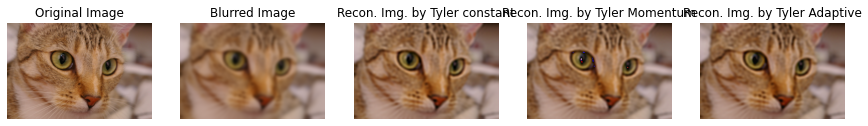

In [96]:
# Initialize variables for RGB processing
x0 = np.zeros_like(image)
x00 = np.zeros_like(image)
x1 = np.ones_like(image)
ri = image.copy()

# Number of iterations
m = 50  # Use a small number for quick testing

# Apply Ashish and Ashish2 algorithms to the color image
reconstructed_1, snr1, time1 = Tyler_color(x0, x00, x1, blurred_image, ri, m)
reconstructed_2, snr2, time2 = Tyler_Momentum_color(x0, x00, x1, blurred_image, ri, m)
reconstructed_3,snr3, time3 = Tyler_Adaptive_color(x0, x00, x1, blurred_image, ri, m)

# Display the images in Jupyter Notebook
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

axes[0].imshow(image.astype(np.uint8))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(blurred_image.astype(np.uint8))
axes[1].set_title("Blurred Image")
axes[1].axis("off")

axes[2].imshow(reconstructed_1.astype(np.uint8))
axes[2].set_title("Recon. Img. by Tyler constant")
axes[2].axis("off")

axes[3].imshow(reconstructed_2.astype(np.uint8))
axes[3].set_title("Recon. Img. by Tyler Momentum")
axes[3].axis("off")

axes[4].imshow(reconstructed_3.astype(np.uint8))
axes[4].set_title("Recon. Img. by Tyler Adaptive")
axes[4].axis("off")
plt.show()


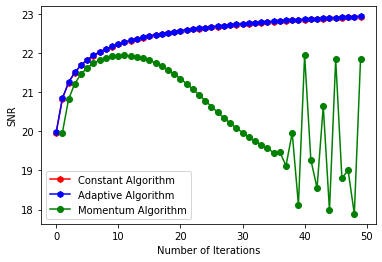

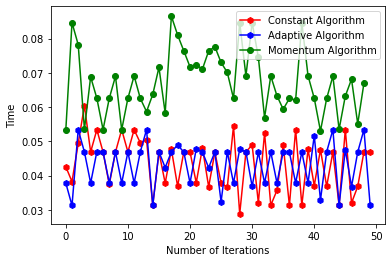

In [97]:
plt.figure()
#plt.plot(range(len(eri)), eri, 'b-h', label='Algorithm M')
#plt.plot(range(len(eri2)), eri2, 'r-o', label='Algorithm M with θ = 0')
plt.plot(range(len(snr1)), snr1, 'r-h', label='Constant Algorithm')
plt.plot(range(len(snr2)), snr2, 'b-h', label='Adaptive Algorithm')
plt.plot(range(len(snr3)), snr3, 'g-o', label='Momentum Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('SNR')
plt.legend()
plt.savefig("SNR_vs_Iteration_Graph_100_iterations_mod_beta_001.png")
plt.show()

# Plot Time Convergence
plt.figure()
#plt.plot(range(len(tim)), tim, label='Algorithm M')
#plt.plot(range(len(tim2)), tim2, label='Algorithm M with θ = 0')
plt.plot(range(len(time1)), time1, 'r-h', label='Constant Algorithm')
plt.plot(range(len(time2)), time2, 'b-h', label='Adaptive Algorithm')
plt.plot(range(len(time3)), time3, 'g-o', label='Momentum Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('Time')
plt.legend()
plt.savefig("Time_vs_Iteration_Graph_100_iterations_mod_beta_001.png")
plt.show()

In [103]:
image = data.coffee()

# Apply Gaussian Blur to the color image
blurred_image = np.zeros_like(image)
for i in range(3):  # Process each color channel separately (R, G, B)
    blurred_image[:, :, i] = gaussian_filter(image[:, :, i], sigma=4)

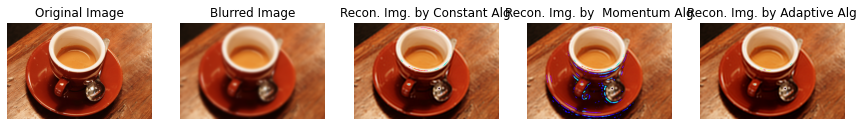

In [104]:
# Initialize variables for RGB processing
x0 = np.zeros_like(image)
x00 = np.zeros_like(image)
x1 = np.ones_like(image)
ri = image.copy()

# Number of iterations
m = 50  # Use a small number for quick testing

# Apply Ashish and Ashish2 algorithms to the color image
reconstructed_1, snr1, time1 = Tyler_color(x0, x00, x1, blurred_image, ri, m)
reconstructed_2, snr2, time2 = Tyler_Momentum_color(x0, x00, x1, blurred_image, ri, m)
reconstructed_3,snr3, time3 = Tyler_Adaptive_color(x0, x00, x1, blurred_image, ri, m)

# Display the images in Jupyter Notebook
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

axes[0].imshow(image.astype(np.uint8))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(blurred_image.astype(np.uint8))
axes[1].set_title("Blurred Image")
axes[1].axis("off")

axes[2].imshow(reconstructed_1.astype(np.uint8))
axes[2].set_title("Recon. Img. by Constant Alg")
axes[2].axis("off")

axes[3].imshow(reconstructed_2.astype(np.uint8))
axes[3].set_title("Recon. Img. by  Momentum Alg")
axes[3].axis("off")

axes[4].imshow(reconstructed_3.astype(np.uint8))
axes[4].set_title("Recon. Img. by Adaptive Alg")
axes[4].axis("off")

plt.show()


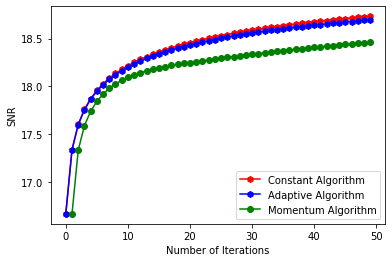

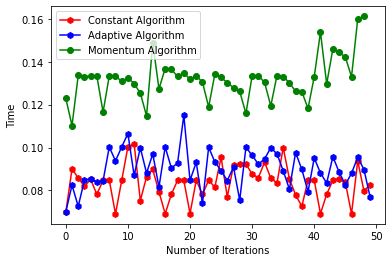

In [105]:
plt.figure()
#plt.plot(range(len(eri)), eri, 'b-h', label='Algorithm M')
#plt.plot(range(len(eri2)), eri2, 'r-o', label='Algorithm M with θ = 0')
plt.plot(range(len(snr1)), snr1, 'r-h', label='Constant Algorithm')
plt.plot(range(len(snr2)), snr2, 'b-h', label='Adaptive Algorithm')
plt.plot(range(len(snr3)), snr3, 'g-o', label='Momentum Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('SNR')
plt.legend()
plt.savefig("SNR_vs_Iteration_Graph_100_iterations_mod_beta_001.png")
plt.show()

# Plot Time Convergence
plt.figure()
#plt.plot(range(len(tim)), tim, label='Algorithm M')
#plt.plot(range(len(tim2)), tim2, label='Algorithm M with θ = 0')
plt.plot(range(len(time1)), time1, 'r-h', label='Constant Algorithm')
plt.plot(range(len(time2)), time2, 'b-h', label='Adaptive Algorithm')
plt.plot(range(len(time3)), time3, 'g-o', label='Momentum Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('Time')
plt.legend()
plt.savefig("Time_vs_Iteration_Graph_100_iterations_mod_beta_001.png")
plt.show()

In [106]:
print('SNR value for Const Alg {0} dB, Time {1}s'.format(snr1[-1],time1[-1]))
print('SNR value for Adapt Alg {0} dB, Time {1}s'.format(snr2[-1],time2[-1]))
print('SNR value for Moment Alg {0} dB, Time {1}s'.format(snr3[-1],time3[-1]))

SNR value for Const Alg 18.733167420064557 dB, Time 0.08271265029907227s
SNR value for Adapt Alg 18.695343589504297 dB, Time 0.07682991027832031s
SNR value for Moment Alg 18.460636759962732 dB, Time 0.16126084327697754s
